#Clustering Analysis - Breakfast Cereals

With a set of nutritional data, consisting of 14 features for 77 different cereals, we can explore unsupervised machine learning techniques known as clustering. Once our data has been prepared properly, we can use different methods to group the cereals together and look for meaningful patterns in the clusters.

First, we import the required packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.cluster import KMeans
import scipy

%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

Then read in the data, replacing missing values with None (first pass):

In [2]:
data = pd.read_csv('cereals.csv')  # next time set na_values=-1... to simplify this
print('Missing (-1) values:\n', data[data==-1].dropna(how='all',axis=[0,1]))
columns = data[data==-1].dropna(how='all',axis=[0,1]).columns
for col in columns:
    data.loc[data[col]==-1, col] = None# int(data[col].mean())
    # Use None here instaed of the mean, especially since the -1 will affect mean()
data = pd.get_dummies(data, columns=['mfr','type'])  # Convert mfr and type to numbers
data.head()

Missing (-1) values:
     carbo  sugars  potass
4     NaN     NaN      -1
20    NaN     NaN      -1
57     -1      -1     NaN


,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,100%_Bran,70,4,1,130,10,5,6,280,25,...,0.33,0,0,0,1,0,0,0,1,0
1,100%_Natural_Bran,120,3,5,15,2,8,8,135,0,...,1.00,0,0,0,0,0,1,0,1,0
2,All-Bran,70,4,1,260,9,7,5,320,25,...,0.33,0,0,1,0,0,0,0,1,0
3,All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330,25,...,0.50,0,0,1,0,0,0,0,1,0
4,Almond_Delight,110,2,2,200,1,14,8,NaN,25,...,0.75,0,0,0,0,0,0,1,1,0


In [3]:
data[data==-1].dropna(how='all',axis=[0,1])  # Verify the -1s are removed

""


Now we'll look for correlations between features (columns), filtering out anything with a low score (not correlated)

In [4]:
corrs = data.corr()
for i in range(len(corrs)):
    # Replace all the diagonals with None, so they can be dropped
    corrs.ix[i,i] = None
sig = corrs[(corrs>0.5) | (corrs < -0.5)].dropna(how='all', axis=[0,1]) # Drop insignificant row/col
sig

,calories,protein,fiber,sugars,potass,weight,cups,mfr_A,type_C,type_H
calories,NaN,NaN,NaN,0.566533,NaN,0.696091,NaN,NaN,NaN,NaN
protein,NaN,NaN,0.500330,NaN,0.563706,NaN,NaN,NaN,NaN,NaN
fiber,NaN,0.500330,NaN,NaN,0.911528,NaN,-0.513061,NaN,NaN,NaN
sugars,0.566533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
potass,NaN,0.563706,0.911528,NaN,NaN,NaN,-0.501607,NaN,NaN,NaN
weight,0.696091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cups,NaN,NaN,-0.513061,NaN,-0.501607,NaN,NaN,NaN,NaN,NaN
mfr_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.569703,0.569703
type_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.569703,NaN,-1.000000
type_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.569703,-1.000000,NaN


We can also plot a (very dense) diagram plotting each feature against another to visually see correlations or lack thereof.

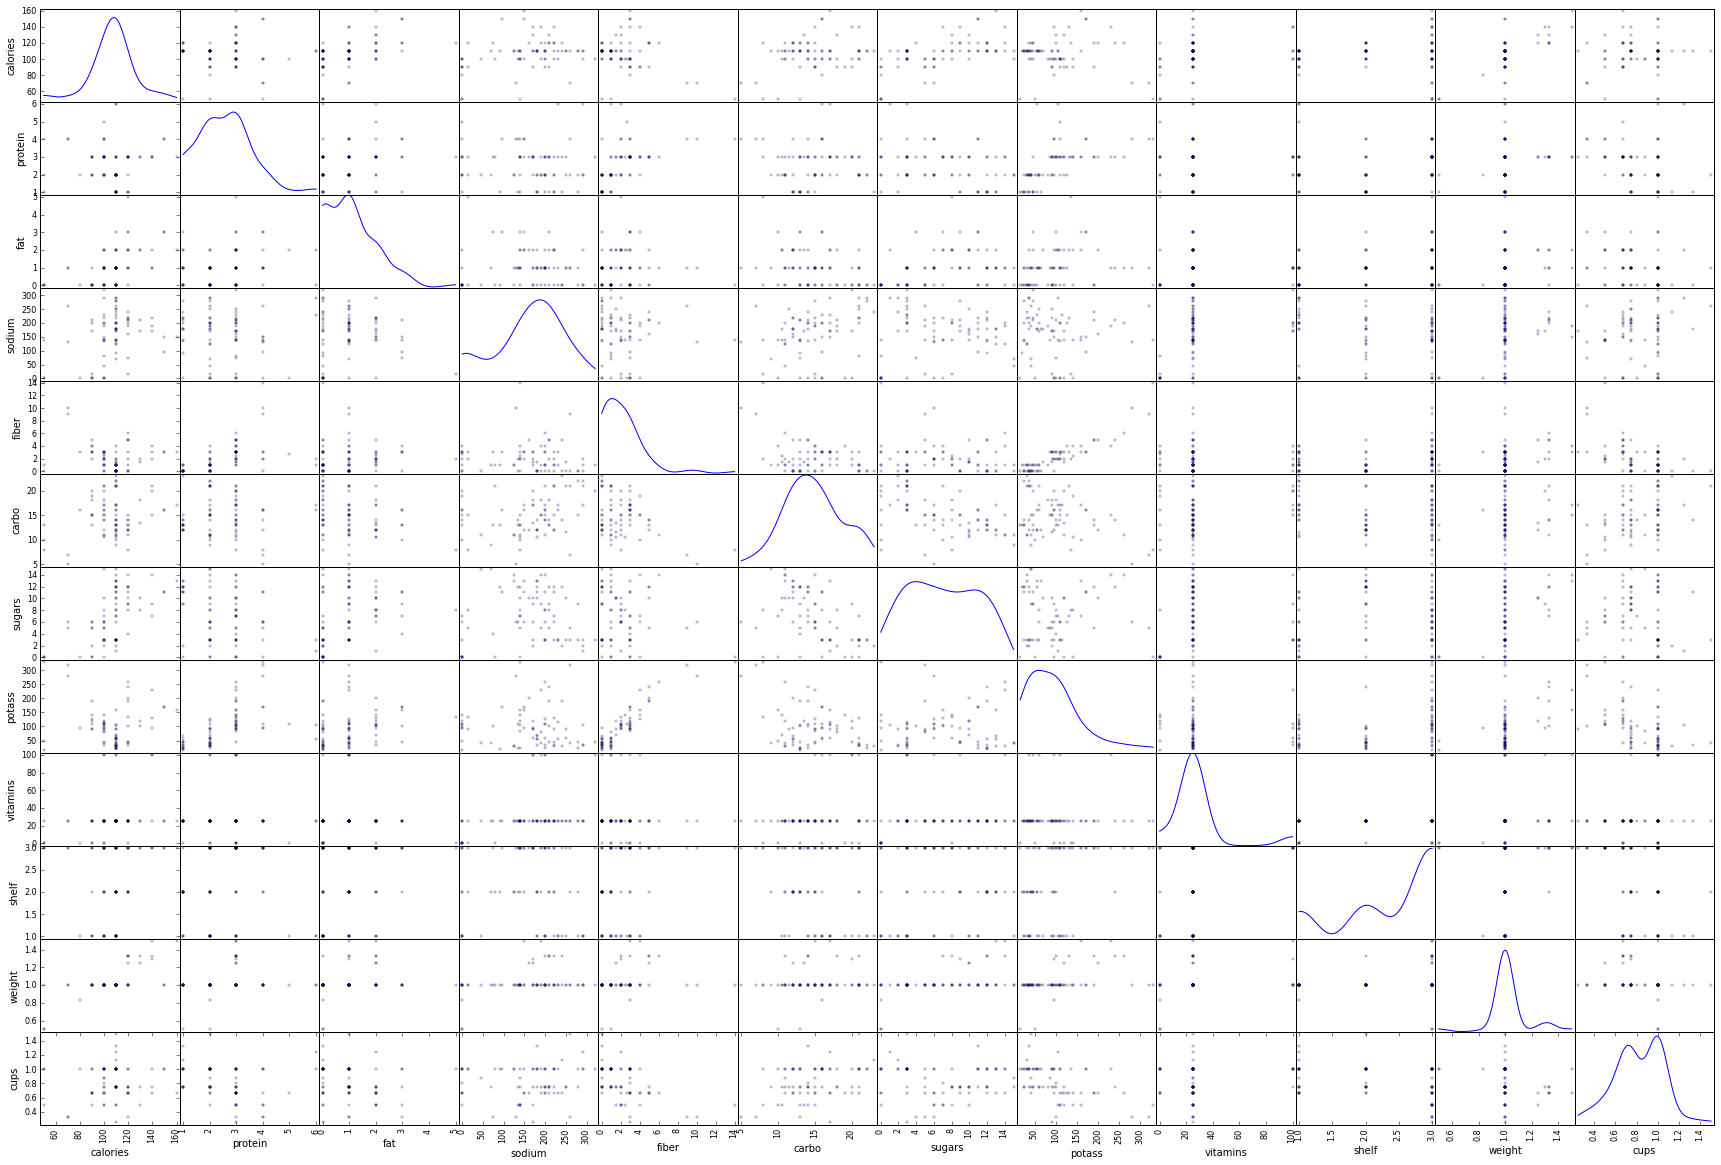

In [5]:
scatter_matrix(data.ix[:,:-9], alpha=0.2, figsize=(30, 20), diagonal='kde');

###Observations:
- Both sugar and weight have a positive correlation with total calories, which is not too surprising
- Protein is mildly correlated with both fiber and potassium content
- Fiber is also strongly positively correlated with potassium content
- On the other hand, fiber is negatively correlated with the volume (cups) of a cereal (a little goes a long way)
- For the categorical data, we learn that cold cereals are never hot in this data set, and that manufacturer "A" favors hot cereals
- We can make an educated guess to replace the two missing potassium values (using linear regression), but there are no strong correlations to help us with the sugar or carb content

In [6]:
# missing = pd.read_csv('cereals.csv', na_values=-1)  # next time set na_values=-1... to simplify this
# # print('Missing (-1) values:\n', data[data==-1].dropna(how='all',axis=[0,1]))
# missing.fillna(value=999)
# missing[missing==999].dropna(how='all',axis=[0,1])

In [7]:
#Now do linear regression on fiber

from sklearn.linear_model import LinearRegression
from sklearn.cluster import MeanShift, estimate_bandwidth
not_missing = data.dropna(how='any')
lr = LinearRegression()
y = not_missing.loc[:, 'potass']
x = not_missing.loc[:, 'fiber'].to_frame()
lr.fit(x,y)
lr.predict(1)

array([ 67.1707])

In [13]:
# data = pd.read_csv('cereals.csv', na_values=-1)
data = data.set_index('name') #So that we can impute the mean
#                        #TODO: Convert mfr, type to dummy variables (onehot)

In [14]:
# data.pop('mfr')# Remove these for now, but later encode with OneHot dummy variables
# data.pop('type')

In [15]:
data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
name,,,,,,,,,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10,5,6,280,25,3,...,0.33,0,0,0,1,0,0,0,1,0
100%_Natural_Bran,120,3,5,15,2,8,8,135,0,3,...,1.00,0,0,0,0,0,1,0,1,0
All-Bran,70,4,1,260,9,7,5,320,25,3,...,0.33,0,0,1,0,0,0,0,1,0
All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330,25,3,...,0.50,0,0,1,0,0,0,0,1,0
Almond_Delight,110,2,2,200,1,14,8,NaN,25,3,...,0.75,0,0,0,0,0,0,1,1,0


In [16]:
data.iloc[1].name

'100%_Natural_Bran'

In [17]:
# columns = {i: col for i,col in enumerate(data.columns)}
# rows = {i: data.iloc(i).name for i in list(range(len(data)))}

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean')#, axis=0)#, verbose=0, copy=True)
df = pd.DataFrame(imp.fit_transform(data), columns=data.columns, index=data.index)
df.head()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
name,,,,,,,,,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10,5,6,280.000000,25,3,...,0.33,0,0,0,1,0,0,0,1,0
100%_Natural_Bran,120,3,5,15,2,8,8,135.000000,0,3,...,1.00,0,0,0,0,0,1,0,1,0
All-Bran,70,4,1,260,9,7,5,320.000000,25,3,...,0.33,0,0,1,0,0,0,0,1,0
All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330.000000,25,3,...,0.50,0,0,1,0,0,0,0,1,0
Almond_Delight,110,2,2,200,1,14,8,98.666667,25,3,...,0.75,0,0,0,0,0,0,1,1,0


In [18]:
## Need to normalize to something (maybe calories) first!!sc

In [19]:
kmeans = KMeans(5)
scaled = preprocessing.scale(df)
kmeans.fit(scaled)
clusters = (kmeans.predict(scaled))
print(kmeans.cluster_centers_)
print(clusters)
#centroids, clusters = kmeans(img_data, 3)

[[-0.1109  0.0792 -0.3814  0.8823 -0.3531  1.0339 -0.8343 -0.4506  0.5651
  -0.2512 -0.1981  0.6534 -0.1147  0.0666  0.1523 -0.2907 -0.3638 -0.3405
   0.6944  0.2013 -0.2013]
 [-0.8722  0.3741 -0.013  -0.8537  0.7101 -0.5354 -0.6562  0.5436 -0.4681
   0.4397 -0.5707 -0.7501 -0.1147 -0.4216 -0.1324  0.5976  0.2291  0.4398
  -0.3405  0.2013 -0.2013]
 [-0.3556  1.3373 -0.013  -1.597  -0.388   0.6392 -0.8525  0.037  -0.8971
  -0.6542 -0.1981  0.2983  2.8295 -0.6325 -0.6526  0.9529 -0.3638  0.7519
  -0.3405 -4.9666  4.9666]
 [ 0.1845 -0.9194 -0.013   0.1349 -0.6401 -0.5853  0.9721 -0.7149 -0.1463
  -0.581  -0.1981  0.259  -0.1147  0.4743 -0.0568 -0.2907  0.0606 -0.0426
  -0.3405  0.2013 -0.2013]
 [ 1.4525  0.5711  0.6537  0.249   0.5869  0.2133  0.9002  1.0636  0.4169
   0.8571  1.7251 -0.2712 -0.1147 -0.0791  0.2577 -0.2907  0.155  -0.3405
   0.2057  0.2013 -0.2013]]
[1 1 1 1 0 3 3 4 0 1 3 0 3 1 3 0 0 3 3 1 2 0 3 0 3 3 1 4 4 3 3 3 1 1 1 3 3
 3 0 4 0 1 3 2 4 4 4 3 3 4 0 4 4 0 1 1 1 2 4 1 1 

In [20]:
data.head()
# print(kmeans)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
name,,,,,,,,,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10,5,6,280,25,3,...,0.33,0,0,0,1,0,0,0,1,0
100%_Natural_Bran,120,3,5,15,2,8,8,135,0,3,...,1.00,0,0,0,0,0,1,0,1,0
All-Bran,70,4,1,260,9,7,5,320,25,3,...,0.33,0,0,1,0,0,0,0,1,0
All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330,25,3,...,0.50,0,0,1,0,0,0,0,1,0
Almond_Delight,110,2,2,200,1,14,8,NaN,25,3,...,0.75,0,0,0,0,0,0,1,1,0


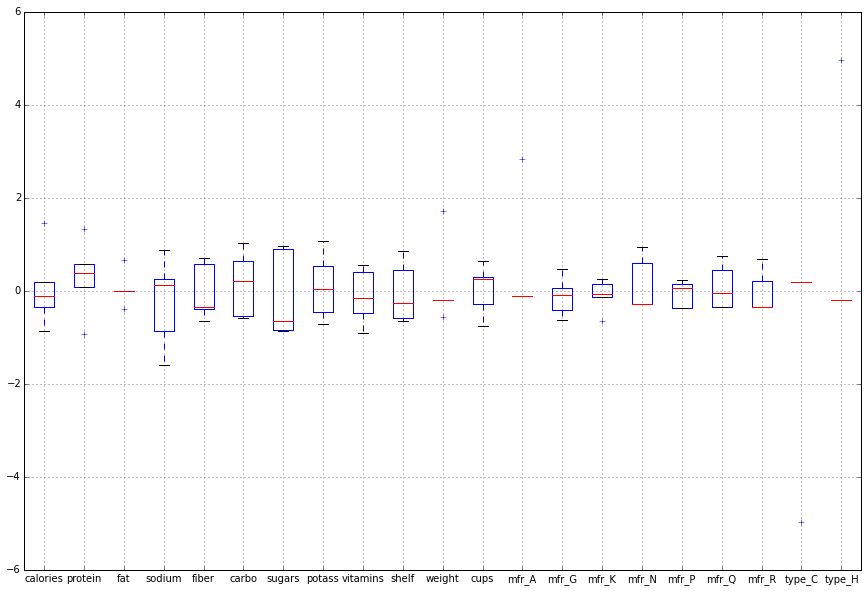

In [21]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
# centroids.plot(figsize=(15,10), kind='bar')
# centroids.plot(figsize=(15,10), kind='box')
centroids.plot(figsize=(15,10), kind='box')
# centroids.plot(figsize=(15,10), kind='line')

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#dfm = df.groupby('label').mean()

In [28]:
# clustered_cereals = [(label, data.iloc[i].name) for (i,label) in enumerate(list(clusters))]
# clustered_cereals
# pd.DataFrame(sorted(clustered_cereals, key=lambda x: x[0]))
df['label'] = np.array(clusters)
df.set_index(['label', df.index])

calories  protein  fat  sodium  \
label name                                                                     
1     Almond_Delight                               110        2    2     200   
      Bran_Chex                                     90        2    1     200   
      Cheerios                                     110        6    2     290   
      Corn_Chex                                    110        2    0     280   
0     Corn_Flakes                                  100        2    0     290   
3     Crispix                                      110        2    0     220   
      Double_Chex                                  100        2    0     190   
4     Just_Right_Crunchy__Nuggets                  110        2    1     170   
0     Kix                                          110        2    1     260   
1     Nutri-grain_Wheat                             90        3    0     170   
3     Product_19                                   100        3    0     320   
0     Rice_Chex                                    110        1    0     240   
3     Rice_Krispies                                110        2    0     290   
1     Special_K                                    110        6    0     230   
3     Total_Corn_Flakes                            110        2    1     200   
0     Total_Whole_Grain                            100        3    1     200   
      Triples                                      110        2    1     250   
3     Wheat_Chex                                   100        3    1     230   
      Wheaties                                     100        3    1     200   
1     100%_Bran                                     70        4    1     130   
2     100%_Natural_Bran                            120        3    5      15   
0     All-Bran                                      70        4    1     260   
3     All-Bran_with_Extra_Fiber                     50        4    0     140   
0     Bran_Flakes                                   90        3    0     210   
3     Clusters                                     110        3    2     140   
      Cracklin'_Oat_Bran                           110        3    3     140   
1     Frosted_Mini-Wheats                          100        3    0       0   
4     Grape-Nuts                                   110        3    0     170   
      Grape_Nuts_Flakes                            100        3    1     140   
3     Great_Grains_Pecan                           120        3    3      75   
...                                                ...      ...  ...     ...   
      Cocoa_Puffs                                  110        1    1     180   
      Corn_Pops                                    110        1    0      90   
4     Count_Chocula                                110        1    1     180   
0     Crispy_Wheat_&_Raisins                       100        2    1     140   
4     Froot_Loops                                  110        2    1     125   
      Frosted_Flakes                               110        1    0     200   
0     Fruity_Pebbles                               110        1    1     135   
1     Golden_Crisp                                 100        2    0      45   
      Golden_Grahams                               110        1    1     280   
      Honey-comb                                   110        1    0     180   
2     Honey_Graham_Ohs                             120        1    2     220   
4     Honey_Nut_Cheerios                           110        3    1     250   
1     Lucky_Charms                                 110        2    1     180   
      Multi-Grain_Cheerios                         100        2    1     220   
0     Nut&Honey_Crunch                             120        2    1     190   
      Smacks                                       110        2    1      70   
1     Trix                                         110        1    1     140   
      Wheaties_Honey_Gold                     

In [23]:
df['name'] = data.index
df = df.sort(['label', 'name'])
# tuples = list(zip(df.label, df.index))
# index = pd.MultiIndex.from_tuples(tuples, names=['label', 'name'])
# ml = pd.DataFrame(df, index=index)
# ml['name'] = df.index
# ml = ml.dropna(axis = 1)
# df.ix[:,0:-2]
grouped = df.set_index(['label', 'name'])
aggs = grouped.groupby(level='label').agg(['mean', 'std'])
aggs

calories              protein                 fat            \
             mean        std      mean       std      mean       std   
label                                                                  
0      104.736842   6.966923  2.631579  1.300022  0.631579  0.683986   
1       90.000000  21.447611  2.952381  0.804748  1.000000  1.378405   
2      100.000000   0.000000  4.000000  1.000000  1.000000  1.000000   
3      110.454545   5.754727  1.545455  0.595801  1.000000  0.755929   
4      135.000000  13.816986  3.166667  0.389249  1.666667  0.887625   

           sodium                fiber           ...     mfr_P            \
             mean        std      mean       std ...      mean       std   
label                                            ...                       
0      233.157895  44.727897  1.315789  1.293257 ...  0.000000  0.000000   
1       88.571429  82.932847  3.833333  3.283799 ...  0.190476  0.402374   
2       26.666667  46.188022  1.233333  1.365040 ...  0.000000  0.000000   
3      170.909091  57.479528  0.636364  0.710161 ...  0.136364  0.351250   
4      180.416667  39.454135  3.541667  1.437459 ...  0.166667  0.389249   

          mfr_Q               mfr_R           type_C     type_H      
           mean       std      mean       std   mean std   mean std  
label                                                                
0      0.000000  0.000000  0.315789  0.477567      1   0      0   0  
1      0.238095  0.436436  0.000000  0.000000      1   0      0   0  
2      0.333333  0.577350  0.000000  0.000000      0   0      1   0  
3      0.090909  0.294245  0.000000  0.000000      1   0      0   0  
4      0.000000  0.000000  0.166667  0.389249      1   0      0   0  

[5 rows x 42 columns]

In [24]:
# np.array(aggs.columns.levels)

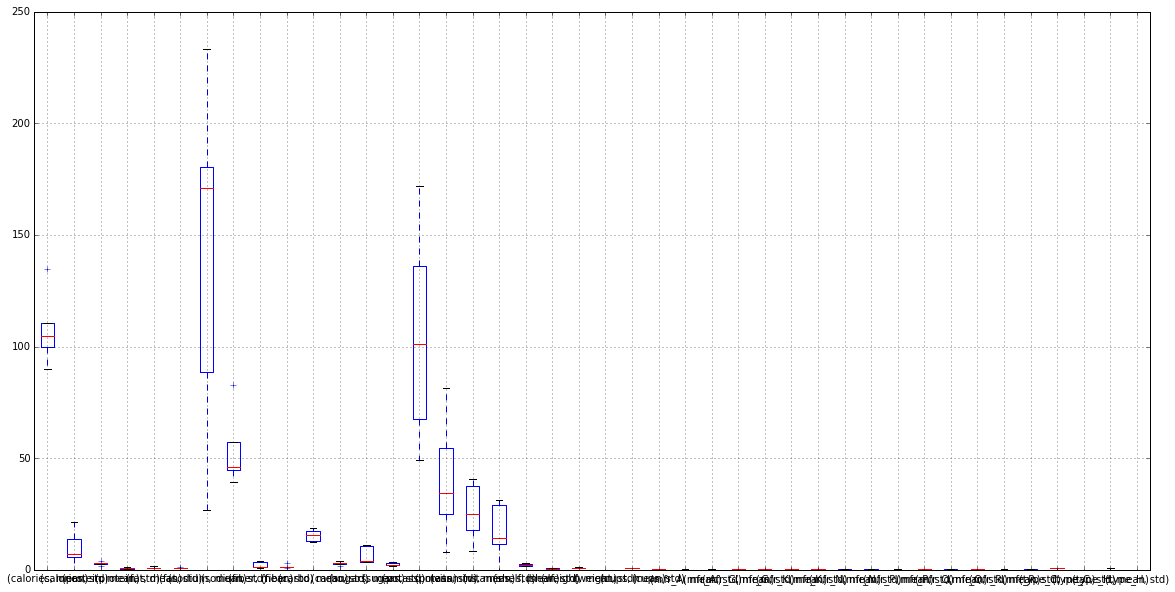

In [25]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# ax.bar( [0,1,2], [1,3,5] )
# ax.set_xticks( [ 0.5, 1.5, 2.5 ] )
# ax.set_xticklabels( ['tom','dick','harry'], rotation=45 ) ;
##ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

# http://matplotlib.org/examples/pylab_examples/boxplot_demo2.html
# fig, ax1 = plt.subplots(figsize=(10,6))
# xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
# plt.setp(xtickNames, rotation=45, fontsize=8)
# bp = plt.boxplot(aggs, notch=0, sym='+', vert=1, whis=1.5)

aggs.plot(kind='box', figsize=(20,10))#, ax=ax1)


In [26]:
# plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
# plt.show()

In [27]:
# df.merge()

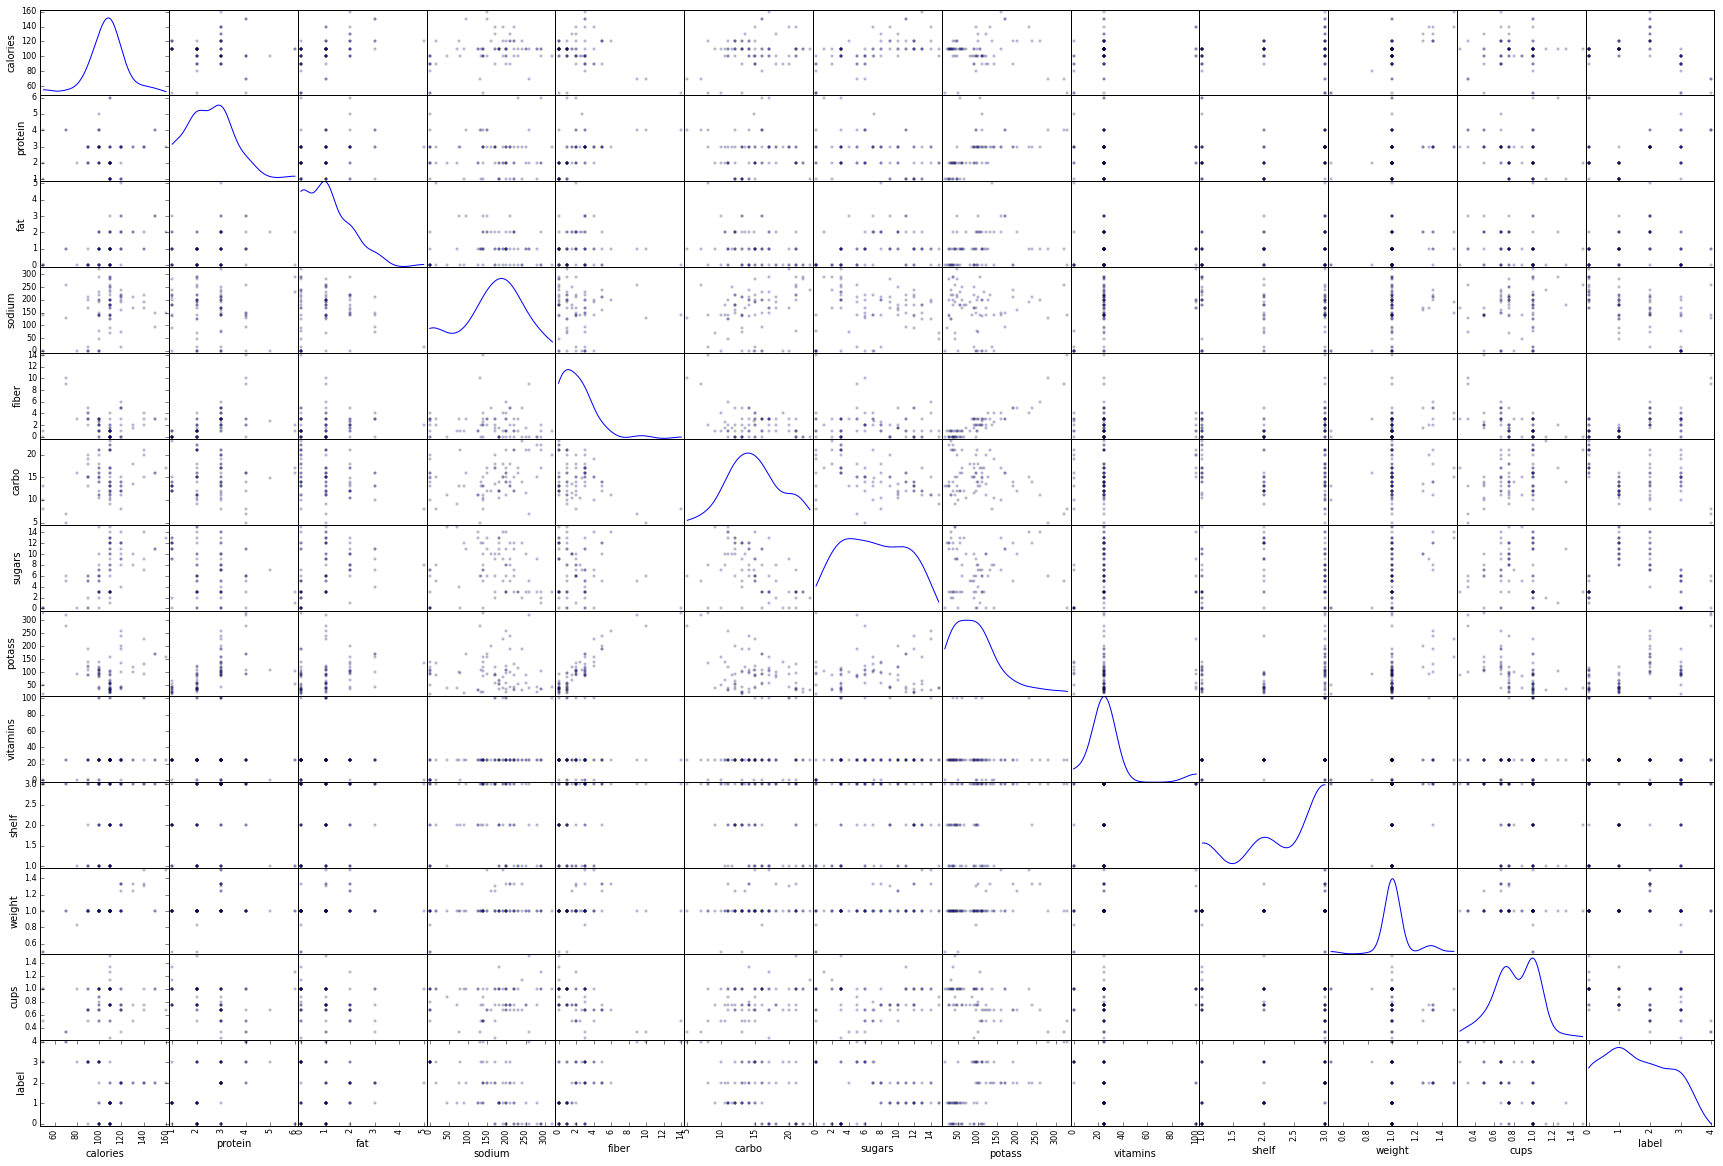